In [1]:
import cv2
import numpy as np
import os
import csv
import glob

# Parent folder path containing the digit and alphabet folders
parent_folder_path = "C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images"

# Define the labels for digits and alphabets
digit_labels = list(range(10))
alphabet_labels = ['a', 'aaa', 'e', 'eee', 'u', 'uuu', 'ru', 'ye', 'yeee', 'ai', 'o', 'ooo', 'oww', 'am', 'aha']

# Define the header for the CSV file
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

with open('kan_data.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Load the captured images and preprocess them
train_x = []
train_y = []

# Process digits and alphabets
for label in digit_labels + alphabet_labels:
    dirList = glob.glob(os.path.join(parent_folder_path, str(label), "*.png"))

    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

        data = []
        data.append(label)

        # Flatten the image data
        flattened_image = roi.flatten() / 255.0
        data.extend(flattened_image)

        train_x.append(flattened_image)
        train_y.append(label)

        with open('kan_data.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Save the training dataset as numpy arrays
np.save("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_x.npy", train_x)
np.save("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_y.npy", train_y)


In [2]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('kan_data.csv',dtype=str)
# Identify duplicates
duplicates = data[data.duplicated()]

# Remove duplicates
data = data.drop_duplicates()

# Shuffle the dataset
data = shuffle(data)

data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5357,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1267,e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,ru,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5725,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1607843137254902,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5995,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1607843137254902,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1706,ye,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import numpy as np

X = data.drop(["label"],axis=1)
Y = data["label"]

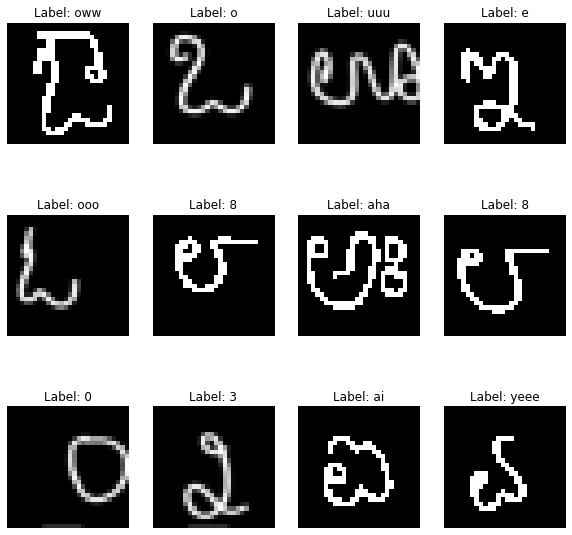

In [4]:
import matplotlib.pyplot as plt

def display_shuffled_images(images, labels, rows, cols):
    # Combine images and labels into a single array for shuffling
    combined_data = list(zip(images, labels))
    np.random.shuffle(combined_data)
    
    # Unpack the shuffled data
    shuffled_images, shuffled_labels = zip(*combined_data)

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            img = shuffled_images[idx].reshape(28, 28).astype(float)  # Convert to float
            label = shuffled_labels[idx]

            axes[i, j].imshow(img, cmap='gray')
            axes[i, j].set_title(f"Label: {label}")
            axes[i, j].axis('off')

    plt.show()

# Specify the number of rows and columns for the grid
num_rows = 3
num_cols = 4

# Assuming X is a DataFrame containing image data and Y is a Series containing labels
# You can adapt this based on your specific data structure
# Display a shuffled set of images from your dataset
display_shuffled_images(X.values, Y, num_rows, num_cols)

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
# Load the training dataset
train_x = np.load("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_x.npy")
train_y = np.load("C:/Users/Rumana/Desktop/HandWritten_Kannada/captured_images/train_y.npy")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)


# support vector classifier

In [7]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=6)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=6)

In [8]:
import joblib

joblib.dump(svm_model,"model/svm(digits+a-aha)")

['model/svm(digits+a-aha)']

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained SVC model
svc_model = joblib.load("model/svm(digits+a-aha)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = svc_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 85.26%
Precision: 87.39%
Recall: 85.26%
F1 Score: 85.43%


# K-nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

joblib.dump(knn,"model/knn(digits+a-aha)")

['model/knn(digits+a-aha)']

In [11]:
knn_model = joblib.load("model/knn(digits+a-aha)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = knn_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 81.27%
Precision: 83.88%
Recall: 81.27%
F1 Score: 81.51%


# CNN

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Reshape the data for CNN input
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.1)


Epoch 1/80
64/64 [==============================] - 3s 31ms/step - loss: 2.4708 - accuracy: 0.2820 - val_loss: 1.4728 - val_accuracy: 0.5156
Epoch 2/80
64/64 [==============================] - 1s 23ms/step - loss: 1.0122 - accuracy: 0.7047 - val_loss: 0.7628 - val_accuracy: 0.7867
Epoch 3/80
64/64 [==============================] - 2s 26ms/step - loss: 0.6392 - accuracy: 0.8020 - val_loss: 0.6367 - val_accuracy: 0.8267
Epoch 4/80
64/64 [==============================] - 1s 23ms/step - loss: 0.4364 - accuracy: 0.8726 - val_loss: 0.4848 - val_accuracy: 0.8578
Epoch 5/80
64/64 [==============================] - 1s 18ms/step - loss: 0.3132 - accuracy: 0.9032 - val_loss: 0.4094 - val_accuracy: 0.8711
Epoch 6/80
64/64 [==============================] - 1s 18ms/step - loss: 0.2424 - accuracy: 0.9170 - val_loss: 0.4322 - val_accuracy: 0.8400
Epoch 7/80
64/64 [==============================] - 1s 17ms/step - loss: 0.1673 - accuracy: 0.9526 - val_loss: 0.3431 - val_accuracy: 0.9022
Epoch 8/80
64

Epoch 58/80
64/64 [==============================] - 2s 25ms/step - loss: 5.0225e-05 - accuracy: 1.0000 - val_loss: 0.2576 - val_accuracy: 0.9511
Epoch 59/80
64/64 [==============================] - 1s 20ms/step - loss: 4.7939e-05 - accuracy: 1.0000 - val_loss: 0.2576 - val_accuracy: 0.9511
Epoch 60/80
64/64 [==============================] - 1s 22ms/step - loss: 4.5670e-05 - accuracy: 1.0000 - val_loss: 0.2599 - val_accuracy: 0.9467
Epoch 61/80
64/64 [==============================] - 1s 22ms/step - loss: 4.4365e-05 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 0.9511
Epoch 62/80
64/64 [==============================] - 2s 24ms/step - loss: 4.2435e-05 - accuracy: 1.0000 - val_loss: 0.2620 - val_accuracy: 0.9467
Epoch 63/80
64/64 [==============================] - 1s 21ms/step - loss: 4.0383e-05 - accuracy: 1.0000 - val_loss: 0.2626 - val_accuracy: 0.9511
Epoch 64/80
64/64 [==============================] - 2s 25ms/step - loss: 3.8351e-05 - accuracy: 1.0000 - val_loss: 0.2628 -

In [13]:
model.save('model/cnn(digits+a-aha).h5')

In [14]:
from tensorflow.keras.models import load_model

cnn_model=load_model("model/cnn(digits+a-aha).h5")

y_pred_probs = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy_cnn = accuracy_score(np.argmax(y_test, axis=1), y_pred) * 100
precision_cnn = precision_score(np.argmax(y_test, axis=1), y_pred, average='weighted', zero_division=1)*100
recall_cnn = recall_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100
f1_cnn = f1_score(np.argmax(y_test, axis=1), y_pred, average='weighted')*100

# Display the results
print("Convolutional Neural Network (CNN):")
print("Accuracy: {:.2f}%".format(accuracy_cnn))
print("Precision: {:.2f}".format(precision_cnn))
print("Recall: {:.2f}".format(recall_cnn))
print("F1-score: {:.2f}".format(f1_cnn))


8/8 [==============================] - 0s 6ms/step
Convolutional Neural Network (CNN):
Accuracy: 93.63%
Precision: 94.16
Recall: 93.63
F1-score: 93.65


In [15]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab
from tensorflow.keras.models import load_model


model = load_model("model/cnn(digits+a-aha).h5")  # Update with the correct path to your Kannada digit and alphabet recognition model

images_folder = "img/"

character_actual = None  # Variable to store the actual digit or alphabet drawn by the user

while True:
    img = ImageGrab.grab(bbox=(60, 170, 400, 500))  # Adjust the coordinates to capture the appropriate region

    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Add pixel one by one into the data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    X = np.array(X)  # Convert X to a NumPy array
    if not any(X):
        character = "noCharVisible"
    else:
        prediction = model.predict(X.reshape(1, 28, 28, 1))
        predicted_class_index = np.argmax(prediction)  # Find the index of the maximum value

    # Inverse transform the predicted class index to get the corresponding label
        character = label_encoder.inverse_transform([predicted_class_index])[0]

    # Draw prediction and accuracy on the image
    cv2.putText(im, "Prediction: " + str(character), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    # Wait for user input to set the actual digit or alphabet
    key = cv2.waitKey(1)
    if key == 27:  # If ESC key is pressed, exit the loop
        break

cv2.destroyAllWindows()


1/1 [==============================] - 0s 26ms/step
